<a href="https://colab.research.google.com/github/Enricosaputrah/ProyekDataScience/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TUGAS BESAR 2**

 

* Mata Kuliah: Proyek Data Science
* Dosen : Dr. Rahmat Budiarto, M.Eng
* Jadwal :Rabu	10:15	12:45

Nama Anggota Kelompok 15:


1.   Enrico Saputra / 41518010188
2.   Aldy Erviendri / 41519010137


<strong>K-means Clustering </strong>

K-means Clustering adalah salah satu “unsupervised machine learning algorithms” yang paling sederhana dan populer. K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan tanpa supervisi (unsupervised) dan merupakan salah satu metode yang melakukan pengelompokan data dengan sistem partisi.

Dataset: Data Penindakan Pelanggaran Lalu Lintas Dari Bulan Januari - Juli

Link:
https://data.jakarta.go.id/dataset/data-penindakan-pelanggaran-lalu-lintas-dan-angkutan-jalan-tahun-2021

In [ ]:
#Import Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Import Dataset From Local
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
#Create Data Model
data = pd.read_csv("dataset.csv")
#View Model Head
data.head()

,wilayah,bap_tilang,stop_operasi,bap_polisi,stop_operasi_polisi,penderekan,ocp_roda_dua,ocp_roda_empat,angkut_motor
0,Bidang Dalops,44,139,0,0,73,0,0,0
1,Sudinhub Jakarta Pusat,47,2,52,0,184,237,15,97
2,Sudinhub Jakarta Utara,166,27,0,0,174,0,0,0
3,Sudinhub Jakarta Selatan,44,1,0,0,61,42,75,0
4,Sudinhub Jakarta Barat,184,70,0,0,202,10,5,0


In [ ]:
#Drop Unnecessary Column
data = data.drop(["bap_polisi","stop_operasi_polisi","ocp_roda_dua","ocp_roda_empat","angkut_motor","stop_operasi"], axis = 1)
data.head()

,wilayah,bap_tilang,penderekan
0,Bidang Dalops,44,73
1,Sudinhub Jakarta Pusat,47,184
2,Sudinhub Jakarta Utara,166,174
3,Sudinhub Jakarta Selatan,44,61
4,Sudinhub Jakarta Barat,184,202


In [ ]:
#Create Variable for data clustering
data_x = data.iloc[:, 1:4]
data_x.head()

,bap_tilang,penderekan
0,44,73
1,47,184
2,166,174
3,44,61
4,184,202


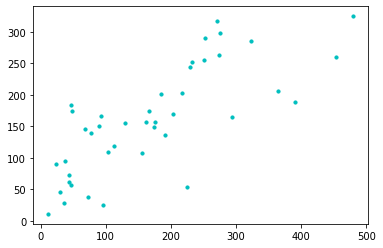

In [ ]:
#visualization Data Distribution
plt.scatter(data.bap_tilang, data.penderekan, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

In [ ]:
#Formatting Data To Array
x_array = np.array(data_x)
print(x_array)

[[ 44  73]
 [ 47 184]
 [166 174]
 [ 44  61]
 [184 202]
 [191 137]
 [ 37  95]
 [ 48 175]
 [251 255]
 [129 155]
 [229 245]
 [276 299]
 [ 90 150]
 [ 68 146]
 [323 285]
 [479 325]
 [270 318]
 [253 291]
 [ 78 139]
 [ 93 166]
 [293 165]
 [454 261]
 [233 252]
 [274 264]
 [ 47  57]
 [ 30  46]
 [174 149]
 [203 169]
 [156 107]
 [162 157]
 [113 119]
 [ 24  90]
 [365 206]
 [390 188]
 [176 157]
 [217 203]
 [ 72  38]
 [ 12  11]
 [224  54]
 [ 95  25]
 [ 36  29]
 [104 110]]


In [ ]:
#Scaling Data (0-1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.06852248, 0.19745223],
       [0.07494647, 0.55095541],
       [0.32976445, 0.51910828],
       [0.06852248, 0.15923567],
       [0.36830835, 0.60828025],
       [0.38329764, 0.40127389],
       [0.05353319, 0.26751592],
       [0.07708779, 0.52229299],
       [0.5117773 , 0.77707006],
       [0.25053533, 0.45859873],
       [0.46466809, 0.74522293],
       [0.56531049, 0.91719745],
       [0.16702355, 0.44267516],
       [0.11991435, 0.42993631],
       [0.66595289, 0.87261146],
       [1.        , 1.        ],
       [0.55246253, 0.97770701],
       [0.51605996, 0.89171975],
       [0.14132762, 0.40764331],
       [0.17344754, 0.49363057],
       [0.60171306, 0.49044586],
       [0.94646681, 0.79617834],
       [0.4732334 , 0.76751592],
       [0.56102784, 0.80573248],
       [0.07494647, 0.14649682],
       [0.0385439 , 0.11146497],
       [0.34689507, 0.43949045],
       [0.40899358, 0.50318471],
       [0.30835118, 0.30573248],
       [0.32119914, 0.46496815],
       [0.

In [ ]:
# Apply and configure kmeans function
kmeans = KMeans(n_clusters = 5, random_state=123)
# Apply Data Cluster
kmeans.fit(x_scaled)

KMeans(n_clusters=5, random_state=123)

In [ ]:
#Print Cluster Center
print(kmeans.cluster_centers_)

[[0.15750654 0.44055202]
 [0.87794433 0.74522293]
 [0.06873662 0.13216561]
 [0.39205762 0.44962362]
 [0.53881156 0.84434713]]


In [ ]:
#Print Cluster Result
print(kmeans.labels_)
#Add Cluster Column
data["kluster"] = kmeans.labels_
#View Data Head
data.head()

[2 0 3 2 3 3 2 0 4 0 4 4 0 0 4 1 4 4 0 0 3 1 4 4 2 2 3 3 3 3 0 2 1 1 3 3 2
 2 3 2 2 0]


,wilayah,bap_tilang,penderekan,kluster
0,Bidang Dalops,44,73,2
1,Sudinhub Jakarta Pusat,47,184,0
2,Sudinhub Jakarta Utara,166,174,3
3,Sudinhub Jakarta Selatan,44,61,2
4,Sudinhub Jakarta Barat,184,202,3


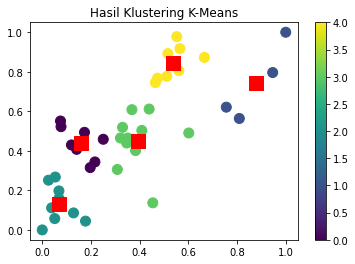

In [ ]:
#visualization Cluster Data
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = data.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()